# Behavior statistics

This notebook panels for Figure 2 showing examples of the stimuli used in the behavioral trials.

In [1]:
import sys
sys.path.insert(0, "../scripts")

In [2]:
%env NBANK_REGISTRY https://gracula.psyc.virginia.edu/neurobank

env: NBANK_REGISTRY=https://gracula.psyc.virginia.edu/neurobank


In [4]:
from pathlib import Path
import shutil

import ewave
import pandas as pd
import matplotlib.pyplot as plt
from dlab import nbank,plotting

import graphics_defaults

In [5]:
# Find all the unique stimuli in the dataset
all_stimuli = set()
trial_data_path = Path("../datasets/zebf-discrim-noise/trials")
for fname in trial_data_path.glob("*probe_trials.csv"):
    trial_data = pd.read_csv("../datasets/zebf-discrim-noise/trials/C280_probe_trials.csv")
    all_stimuli.update(trial_data.stimulus.unique())

In [6]:
# copy them to the stimulus directory
stim_file_path = Path("../datasets/zebf-discrim-noise/stimuli")
for name, fname in nbank.find_resources(*all_stimuli):
    shutil.copy(fname, stim_file_path)

PermissionError: [Errno 13] Permission denied: '../datasets/zebf-discrim-noise/stimuli/jkexyrd5-30_btwmt59w5-55.wav'

In [7]:
foreground = "9ex2k0dy"
background = "btwmt59w1"
background_levels = [-100, -65, -60, -55, -50, -45, -40, -35, -30, -25, -20]
background_levels = [-100, -60, -50, -40, -30, -20]

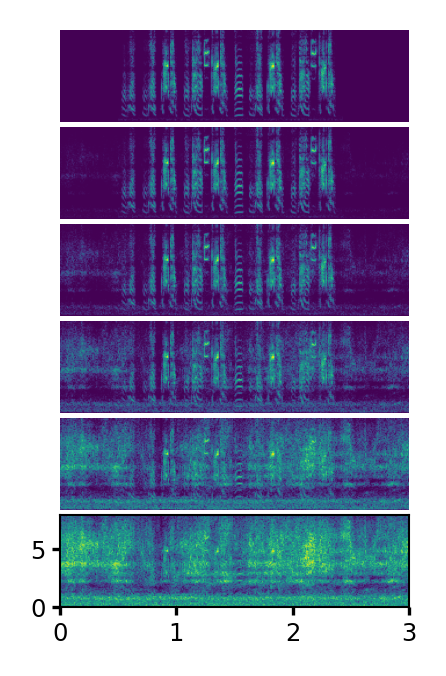

In [8]:
fig, axs = plt.subplots(nrows=len(background_levels), sharex=True, sharey=True, figsize=(1.5, 2.5), dpi=300)

for ax, level in zip(axs, background_levels):
    stim_name = f"{foreground}-30_{background}{level}"
    stim_file = stim_file_path / stim_name
    with ewave.wavfile(stim_file.with_suffix(".wav"), "r") as fp:
        signal, sampling_rate = fp.read(), fp.sampling_rate
    plotting.spectrogram(ax, signal, sampling_rate, frequency_range=(0, 8000), compression=0.01)
    ax.set_yticks([0, 5000], ["0", "5"])
ax.set_xlim(0, 3.0)
for ax in axs[:-1]:
    ax.get_xaxis().set_visible(False)
    ax.set_frame_on(False)
    ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
fig.subplots_adjust(hspace=0.05, wspace=0.1)

In [9]:
fig.savefig("../figures/behavior_example_stims.pdf")